# **Tugas 4 - TF-IDF,Cosine Similarity,Closeness Centrality**

### Nama : Adz Dzikry Pradana Putra
### Nim : 210411100093

### 1.Data Hasil Preprocessing
---

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pickle
import pandas as pd

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/PPW-A/report/Tugas-PPW/hasil_preprocesing.csv")
df.head()

,judul,isi,tanggal,kategori,Hasil cleansing,Hasil case_folding,tokenize,Hasil stopword
0,"Daftar Game PS4, PS5, Xbox, dan PC Rilis Mingg...",Jakarta - Oktober 2024 sudah berjalan selama t...,"Selasa, 08 Okt 2024 14:45 WIB",Games,Jakarta Oktober sudah berjalan selama tujuh ...,jakarta oktober sudah berjalan selama tujuh ...,"['jakarta', 'oktober', 'sudah', 'berjalan', 's...",jakarta oktober berjalan tujuh beragam game me...
1,Studi: Game Single Player Lebih Disukai Gamer ...,Jakarta - Di tengah kepopuleran game multiplay...,"Selasa, 08 Okt 2024 12:15 WIB",Games,Jakarta Di tengah kepopuleran game multiplaye...,jakarta di tengah kepopuleran game multiplaye...,"['jakarta', 'di', 'tengah', 'kepopuleran', 'ga...",jakarta kepopuleran game multiplayer online st...
2,MPL ID S14: Ini Jadwal Playoff dan Bracket Per...,Jakarta - Rangkaian pertandingan di fase liga ...,"Senin, 07 Okt 2024 13:15 WIB",Games,Jakarta Rangkaian pertandingan di fase liga M...,jakarta rangkaian pertandingan di fase liga m...,"['jakarta', 'rangkaian', 'pertandingan', 'di',...",jakarta rangkaian pertandingan fase liga mpl i...
3,Daftar Tim yang Gugur dan Lolos Playoff MPL ID...,Jakarta - MPL ID S14 memasuki babak playoff. S...,"Senin, 07 Okt 2024 11:15 WIB",Games,Jakarta MPL ID S memasuki babak playoff Sudah...,jakarta mpl id s memasuki babak playoff sudah...,"['jakarta', 'mpl', 'id', 's', 'memasuki', 'bab...",jakarta mpl id s memasuki babak playoff enam t...
4,Studi Ungkap Main Game PowerWash Simulator Bai...,"Jakarta - Sebuah studi mengungkapkan, memainka...","Minggu, 06 Okt 2024 15:06 WIB",Games,Jakarta Sebuah studi mengungkapkan memainkan ...,jakarta sebuah studi mengungkapkan memainkan ...,"['jakarta', 'sebuah', 'studi', 'mengungkapkan'...",jakarta studi memainkan salah game square enix...


### TF-IDF Weight
---

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transformasi data kategorik
label_encoder = LabelEncoder()
df.loc[:, 'kategori_encoded'] = label_encoder.fit_transform(df['kategori'])

# Menampilkan nilai sebelum dan sesudah konversi
print("\nNilai sebelum dan sesudah konversi:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

print("\nDataFrame setelah Label Encoding:")
print(df)



Nilai sebelum dan sesudah konversi:
{'Games': 0, 'Sepak Bola': 1}

DataFrame setelah Label Encoding:
                                                judul  \
0   Daftar Game PS4, PS5, Xbox, dan PC Rilis Mingg...   
1   Studi: Game Single Player Lebih Disukai Gamer ...   
2   MPL ID S14: Ini Jadwal Playoff dan Bracket Per...   
3   Daftar Tim yang Gugur dan Lolos Playoff MPL ID...   
4   Studi Ungkap Main Game PowerWash Simulator Bai...   
..                                                ...   
95  Video: Eks Bintang Barcelona Andres Iniesta Um...   
96  2 Pemain Chelsea Diskors Lawan Liverpool, Mare...   
97     Legenda Belanda Johan Neeskens Meninggal Dunia   
98  Man City Menangi Pertarungan Legal Pertama Mel...   
99                     Andres Iniesta Umumkan Pensiun   

                                                  isi  \
0   Jakarta - Oktober 2024 sudah berjalan selama t...   
1   Jakarta - Di tengah kepopuleran game multiplay...   
2   Jakarta - Rangkaian pertandingan di fa

### Pelabelan menggunakan LabelEncoder
---

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x = df['Hasil stopword']
y = df['kategori_encoded']

print(x)
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

print("="*50)
print("Jumlah data latih:", len(x_train))
print("Jumlah data uji:", len(x_test))

0     jakarta oktober berjalan tujuh beragam game me...
1     jakarta kepopuleran game multiplayer online st...
2     jakarta rangkaian pertandingan fase liga mpl i...
3     jakarta mpl id s memasuki babak playoff enam t...
4     jakarta studi memainkan salah game square enix...
                            ...                        
95    gelandang legendaris spanyol andres iniesta me...
96    london chelsea pemain menantang liverpool jeda...
97    aljir johan neeskens legenda ajax barcelona me...
98    manchester manchester city memenangkan pertaru...
99    barcelona andres iniesta resmi kariernya pesep...
Name: Hasil stopword, Length: 100, dtype: object
0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Name: kategori_encoded, Length: 100, dtype: int64
Jumlah data latih: 80
Jumlah data uji: 20


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit dan transform pada data training
x_train_tfidf = tfidf.fit_transform(x_train)

# Mendapatkan nama fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Konversi TF-IDF hasil training ke DataFrame
df_train_tfidf = pd.DataFrame(x_train_tfidf.toarray(), columns=feature_names)

df_train_tfidf

,aaa,abdulkarim,about,abraham,absen,abu,abuabu,ac,academy,acak,...,yukinari,yusoff,yuto,yves,zelvia,zero,zion,zona,zug,zurich
0,0.000000,0.00000,0.0,0.0,0.067807,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.054088,0.0,0.0
1,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0
76,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.029293,0.0,0.0
77,0.051299,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.0,0.051299,0.0,0.0,0.0,0.000000,0.0,0.0
78,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.05073,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0


### Ubah nilai TF-IDF di bawah 0.5 menjadi 0, dan di atas atau sama dengan 0.5 menjadi 1

In [ ]:
df_train_tfidf_binary = df_train_tfidf.apply(lambda col: col.map(lambda x: 1 if x >= 0.5 else 0))

# Menampilkan DataFrame dengan nilai biner
df_train_tfidf_binary

,aaa,abdulkarim,about,abraham,absen,abu,abuabu,ac,academy,acak,...,yukinari,yusoff,yuto,yves,zelvia,zero,zion,zona,zug,zurich
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Membuat graf berdasarkan co-occurrence fitur
---

In [ ]:
G = nx.Graph()

# Menambahkan node ke graf
for feature in df_train_tfidf_binary.columns:
    G.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()

    for j in range(len(active_features)):
        for k in range(j + 1, len(active_features)):
            G.add_edge(active_features[j], active_features[k])

# Hitung degree centrality
degree_centrality = nx.degree_centrality(G)

# Konversi hasil degree centrality ke DataFrame untuk lebih mudah dilihat
df_degree_centrality = pd.DataFrame(degree_centrality.items(), columns=['Node', 'Degree Centrality'])

# Mengurutkan DataFrame dari yang terbesar sampai terkecil
df_degree_centrality_sorted = df_degree_centrality.sort_values(by='Degree Centrality', ascending=False)

# Tampilkan hasil degree centrality yang sudah diurutkan
print(df_degree_centrality_sorted)

         Node  Degree Centrality
538        de           0.000292
1014      gea           0.000292
0         aaa           0.000000
2287    pahit           0.000000
2277  oseania           0.000000
...       ...                ...
1145   hpshps           0.000000
1146   hpsrns           0.000000
1147   hpsvmp           0.000000
1148      hua           0.000000
3423   zurich           0.000000

[3424 rows x 2 columns]


In [ ]:
# Menghapus fitur di bawah top 10 terbaik
top_10_features = df_degree_centrality_sorted.head(10)['Node'].tolist()
filtered_df_train_tfidf_binary = df_train_tfidf_binary[top_10_features]

# Tampilkan hasil DataFrame yang sudah difilter
print("\nDataFrame setelah menghapus fitur di bawah top 10:")
filtered_df_train_tfidf_binary


DataFrame setelah menghapus fitur di bawah top 10:


,de,gea,aaa,pahit,oseania,otomatis,out,outbreak,outlaws,overall
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
75,0,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,0
78,0,0,0,0,0,0,0,0,0,0


### Membuat graf
---

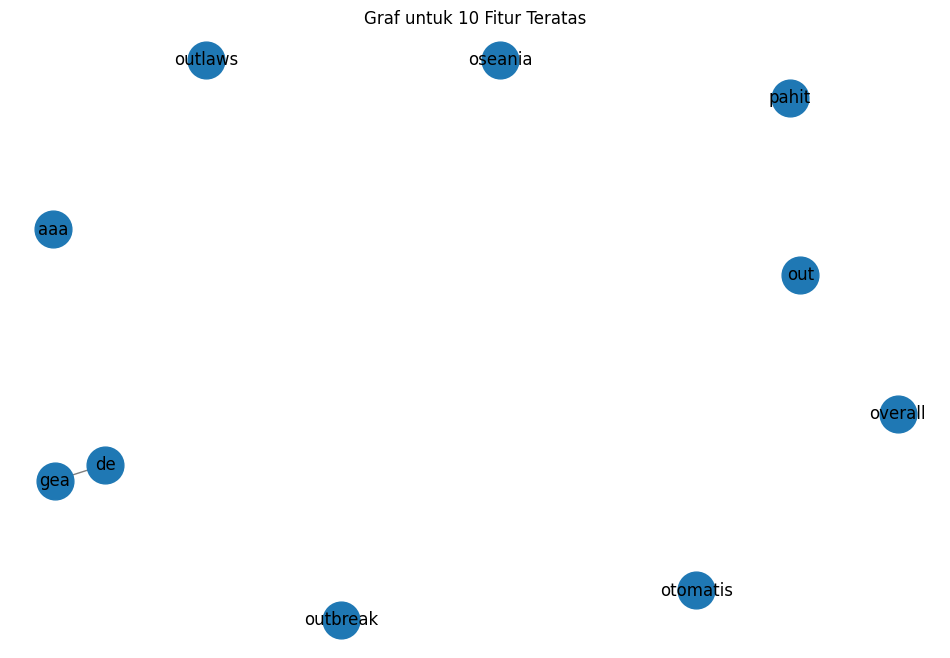

In [ ]:
import matplotlib.pyplot as plt

# Membuat graf baru hanya untuk fitur teratas
G_top_10 = nx.Graph()

# Menambahkan node teratas ke graf
for feature in top_10_features:
    G_top_10.add_node(feature)

# Menambahkan edge berdasarkan co-occurrence dari fitur teratas
for i in range(len(df_train_tfidf_binary)):
    features = df_train_tfidf_binary.iloc[i]
    active_features = features[features == 1].index.tolist()
    active_top_10_features = [f for f in active_features if f in top_10_features]

    for j in range(len(active_top_10_features)):
        for k in range(j + 1, len(active_top_10_features)):
            G_top_10.add_edge(active_top_10_features[j], active_top_10_features[k])

# Mengatur ukuran figure untuk visualisasi graf
plt.figure(figsize=(12, 8))

# Menggambar graf fitur teratas
pos = nx.spring_layout(G_top_10)  # Menggunakan layout spring
nx.draw_networkx_nodes(G_top_10, pos, node_size=700)  # Menggambar node
nx.draw_networkx_edges(G_top_10, pos, width=1.0, alpha=0.5)  # Menggambar edge
nx.draw_networkx_labels(G_top_10, pos, font_size=12, font_family='sans-serif')  # Menggambar label

# Menampilkan graf
plt.title('Graf untuk 10 Fitur Teratas')
plt.axis('off')  # Menyembunyikan sumbu
plt.show()

### Menghitung closeness centrality
---

In [ ]:
closeness_centrality = nx.closeness_centrality(G_top_10)

# Menghitung betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G_top_10)

# Konversi hasil centrality ke DataFrame untuk lebih mudah dilihat
df_closeness_centrality = pd.DataFrame(closeness_centrality.items(), columns=['Node', 'Closeness Centrality'])
df_betweenness_centrality = pd.DataFrame(betweenness_centrality.items(), columns=['Node', 'Betweenness Centrality'])

# Menggabungkan semua centrality ke dalam satu DataFrame
df_centrality = pd.merge(df_degree_centrality_sorted, df_closeness_centrality, on='Node')
df_centrality = pd.merge(df_centrality, df_betweenness_centrality, on='Node')

# Menampilkan hasil centrality
print(df_centrality)

       Node  Degree Centrality  Closeness Centrality  Betweenness Centrality
0        de           0.000292              0.111111                     0.0
1       gea           0.000292              0.111111                     0.0
2       aaa           0.000000              0.000000                     0.0
3     pahit           0.000000              0.000000                     0.0
4   oseania           0.000000              0.000000                     0.0
5  otomatis           0.000000              0.000000                     0.0
6       out           0.000000              0.000000                     0.0
7  outbreak           0.000000              0.000000                     0.0
8   outlaws           0.000000              0.000000                     0.0
9   overall           0.000000              0.000000                     0.0


### Menghitung cosine similarity
---

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Menghitung cosine similarity
cosine_sim_matrix = cosine_similarity(df_train_tfidf_binary[top_10_features].T)

# Membuat DataFrame untuk cosine similarity
df_cosine_sim = pd.DataFrame(cosine_sim_matrix, index=top_10_features, columns=top_10_features)

# Menampilkan hasil cosine similarity
print("Cosine Similarity antara Fitur Teratas:")
print(df_cosine_sim)

Cosine Similarity antara Fitur Teratas:
           de  gea  aaa  pahit  oseania  otomatis  out  outbreak  outlaws  \
de        1.0  1.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
gea       1.0  1.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
aaa       0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
pahit     0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
oseania   0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
otomatis  0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
out       0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
outbreak  0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
outlaws   0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   
overall   0.0  0.0  0.0    0.0      0.0       0.0  0.0       0.0      0.0   

          overall  
de            0.0  
gea           0.0  
aaa           0.0  
pahit         0.0  
oseania     

### **Pengujian sample baru**

---


In [ ]:
# Mengimpor library yang diperlukan
import pandas as pd

news_text_1 = """
jakarta bitget exchange mata uang kripto mengumumkan listing token hamster kombat hmstr diperdagangkan pasar spot tanggal september token hmstr diposisikan salah proyek bekermbang pesat pertumbuhan ekonomi proyek taptoearn diklaim menarik perhatian trader investor hamster kombat game taptoearn game mengandalkan kecepatan menekan tombol game poin sebanyakbanyaknya pemain simulasi manajemen exchange kripto peserta berperan ceo ditugaskan mengembangkan exchange kripto dunia hamster fiksi pemain koin mengetuk koin emas menginvestasikan penghasilan meningkatkan exchange miliknya kombinasi gameplay interaktif simulasi kripto game menawarkan pengalaman memadukan hiburan kompleksitas perdagangan kripto listing bitget memperkenalkan hamster future coins hmstrbg menawarkan kesempatan pengguna terlibat ekosistem hamster kombat produk pra pasar menyediakan akses bitget penggunanya memosisikan strategis pasar mengambil keuntungan potensi pergerakan harga perilisan hmstr luas hmstrbg berfungsi pendahulu listing hmstr trader terlibat aset tahap pra pasar akses mudah prioritas pengguna menjadikan bitget pasar utama perdagangan hmstr diberitakan hamster kombat game pengguna uang model notcoin tim hamster kombat barubaru mengumumkan airdrop the open network ton penghargaan pemain mengumpulkan koin game token kripto diperjualbelikan imingiming mendorong orang memainkan game pemain bergabung mengumpulkan koin airdrop asjrns
"""

news_text_2 = """
jakarta mobile legends ml salah game online populer dunia pemain log out akunnya mengelola akun ml keamanan data privasi akun log out akun ml log out akun ml akun hp hp dimainkan orang dikutip vc gamers langkahlangkah log out akun mobile legends hp menghapus data buka aplikasi mobile legends masuk klik profil masuk menu pengaturan akun klik tombol pusat akun pilih pusatkan perangkat tunggu muncul pemberitahuan pemberitahuan menghapus akun perangkat terhubung muncul proses log out akun ml selesai beralih akun ml akun mengganti akun akun masuk hp otomatis terganti akun log out akun mobile legend berganti akun buka aplikasi ml masuk menu profil pilih menu pengaturan akun klik tombol edit akun pilih ganti akun pakai akun google play games facebook tiktok moonton vk masukkan username password akun terhubung akun ml menunggu proses pergantian akun selesai selesai log out menghapus data akun ml akun ml menghapus data aplikasi mobile legends google play proses menghapus data aplikasi ml log out akun ml menghapus data aplikasi buka menu pengaturan hp masuk menu pengaturan aplikasi cari aplikasi mobile legends klik menu penggunaan datapenggunaan keamanan klik opsi clear datahapus data pengguna android menghapus data aplikasi google play klik menu data usagesecurity usage klik opsi hapus data khqfds
"""


# Mengubah teks menjadi DataFrame
data = pd.DataFrame([news_text_1, news_text_2], columns=['text'])

# Menampilkan DataFrame
print(data)

                                                text
0  \njakarta bitget exchange mata uang kripto men...
1  \njakarta mobile legends ml salah game online ...


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.feature_extraction.text import TfidfVectorizer

# Menghitung TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

# Mengambil nama fitur (kata) dari TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()

# Menghitung skor TF-IDF untuk setiap fitur
tfidf_scores = tfidf_matrix.toarray()
df_tfidf_scores = pd.DataFrame(tfidf_scores, columns=feature_names)

# Mengurutkan DataFrame berdasarkan skor TF-IDF dari terbesar ke terkecil
df_top_features = df_tfidf_scores.sum(axis=0).reset_index()
df_top_features.columns = ['Feature', 'Score']

# Pastikan kolom 'Score' adalah tipe data numerik
df_top_features['Score'] = pd.to_numeric(df_top_features['Score'], errors='coerce')

# Mengurutkan berdasarkan skor
df_top_features = df_top_features.sort_values(by='Score', ascending=False)

# Mengambil 10 fitur terbaik
top_10_features = df_top_features.head(10)

# Menampilkan 10 fitur terbaik
print("10 Fitur Terbaik:\n", top_10_features)


10 Fitur Terbaik:
       Feature     Score
2        akun  0.681729
47    hamster  0.349131
103        ml  0.302991
68     kripto  0.299255
41       game  0.266375
21       data  0.252492
118     pasar  0.249379
65     kombat  0.249379
51      hmstr  0.249379
5    aplikasi  0.201994


In [ ]:
# Mengimpor library yang diperlukan
from sklearn.metrics.pairwise import cosine_similarity

# Mengambil hanya nama fitur dari 10 fitur teratas
top_10_feature_names = top_10_features['Feature'].values

# Mengambil indeks fitur di vocabulary
top_10_feature_indices = [tfidf_vectorizer.vocabulary_[feature] for feature in top_10_feature_names]

# Mengambil kolom TF-IDF untuk 10 fitur teratas
top_10_tfidf_matrix = tfidf_matrix[:, top_10_feature_indices]

# Menghitung cosine similarity
cosine_sim = cosine_similarity(top_10_tfidf_matrix.T)

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menampilkan cosine similarity
print("Cosine Similarity Matrix:\n", cosine_sim_df)

Cosine Similarity Matrix:
               akun   hamster        ml    kripto      game      data  \
akun      1.000000  0.000000  1.000000  0.000000  0.072132  1.000000   
hamster   0.000000  1.000000  0.000000  1.000000  0.997395  0.000000   
ml        1.000000  0.000000  1.000000  0.000000  0.072132  1.000000   
kripto    0.000000  1.000000  0.000000  1.000000  0.997395  0.000000   
game      0.072132  0.997395  0.072132  0.997395  1.000000  0.072132   
data      1.000000  0.000000  1.000000  0.000000  0.072132  1.000000   
pasar     0.000000  1.000000  0.000000  1.000000  0.997395  0.000000   
kombat    0.000000  1.000000  0.000000  1.000000  0.997395  0.000000   
hmstr     0.000000  1.000000  0.000000  1.000000  0.997395  0.000000   
aplikasi  1.000000  0.000000  1.000000  0.000000  0.072132  1.000000   

             pasar    kombat     hmstr  aplikasi  
akun      0.000000  0.000000  0.000000  1.000000  
hamster   1.000000  1.000000  1.000000  0.000000  
ml        0.000000  0.00000

In [ ]:
# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Menampilkan DataFrame klasifikasi
print("\nClassification Matrix:\n", classification)



Classification Matrix:
           akun  hamster  ml  kripto  game  data  pasar  kombat  hmstr  \
akun         1        0   1       0     0     1      0       0      0   
hamster      0        1   0       1     1     0      1       1      1   
ml           1        0   1       0     0     1      0       0      0   
kripto       0        1   0       1     1     0      1       1      1   
game         0        1   0       1     1     0      1       1      1   
data         1        0   1       0     0     1      0       0      0   
pasar        0        1   0       1     1     0      1       1      1   
kombat       0        1   0       1     1     0      1       1      1   
hmstr        0        1   0       1     1     0      1       1      1   
aplikasi     1        0   1       0     0     1      0       0      0   

          aplikasi  
akun             1  
hamster          0  
ml               1  
kripto           0  
game             0  
data             1  
pasar            0  
kom

In [ ]:
# Membuat graf dari matriks klasifikasi
G = nx.from_pandas_adjacency(classification)

# Menghitung degree
degree = dict(G.degree())
print("\nDegree:\n", degree)

# Menghitung closeness centrality
closeness = nx.closeness_centrality(G)
print("\nCloseness Centrality:\n", closeness)

# Menghitung betweenness centrality
betweenness = nx.betweenness_centrality(G)
print("\nBetweenness Centrality:\n", betweenness)


Degree:
 {'akun': 5, 'hamster': 7, 'ml': 5, 'kripto': 7, 'game': 7, 'data': 5, 'pasar': 7, 'kombat': 7, 'hmstr': 7, 'aplikasi': 5}

Closeness Centrality:
 {'akun': 0.3333333333333333, 'hamster': 0.5555555555555556, 'ml': 0.3333333333333333, 'kripto': 0.5555555555555556, 'game': 0.5555555555555556, 'data': 0.3333333333333333, 'pasar': 0.5555555555555556, 'kombat': 0.5555555555555556, 'hmstr': 0.5555555555555556, 'aplikasi': 0.3333333333333333}

Betweenness Centrality:
 {'akun': 0.0, 'hamster': 0.0, 'ml': 0.0, 'kripto': 0.0, 'game': 0.0, 'data': 0.0, 'pasar': 0.0, 'kombat': 0.0, 'hmstr': 0.0, 'aplikasi': 0.0}


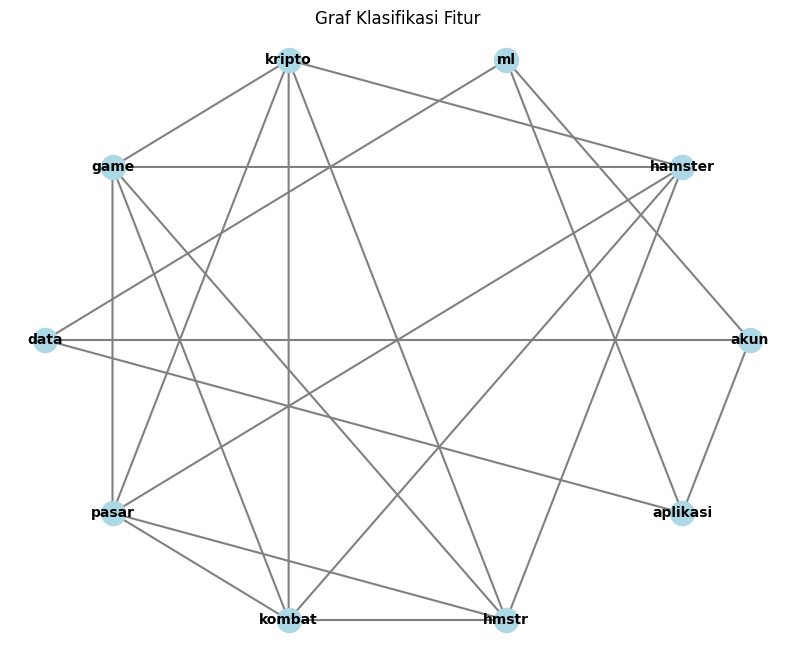

In [ ]:
import matplotlib.pyplot as plt

# Mengubah hasil cosine similarity menjadi DataFrame untuk kemudahan analisis
cosine_sim_df = pd.DataFrame(cosine_sim, index=top_10_feature_names, columns=top_10_feature_names)

# Menambahkan klasifikasi berdasarkan nilai cosine similarity
classification = (cosine_sim_df >= 0.5).astype(int)

# Plot setup
plt.figure(figsize=(10, 8))

# Membuat posisi untuk node secara manual dalam sebuah lingkaran
num_features = len(top_10_feature_names)
angles = [2 * i * 3.14159 / num_features for i in range(num_features)]
positions = {top_10_feature_names[i]: (np.cos(angles[i]), np.sin(angles[i])) for i in range(num_features)}

# Plot node
for feature, pos in positions.items():
    plt.scatter(*pos, s=300, color='lightblue', zorder=2)
    plt.text(pos[0], pos[1], feature, fontsize=10, ha='center', va='center', fontweight='bold', zorder=3)

# Plot edges berdasarkan cosine similarity >= 0.5
for i in range(num_features):
    for j in range(i+1, num_features):
        if classification.iloc[i, j] == 1:
            pos1 = positions[top_10_feature_names[i]]
            pos2 = positions[top_10_feature_names[j]]
            plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], color='gray', zorder=1)

# Pengaturan plot
plt.title("Graf Klasifikasi Fitur")
plt.axis('off')  # Menghilangkan sumbu
plt.show()